# Regressão logística

## Bibliotecas

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importação de dados

In [134]:
data = pd.read_csv('data/ex2data1.txt', header=None, names=['P1', 'P2', 'Aprovado'])
data.head()

,P1,P2,Aprovado
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Visualização de dados

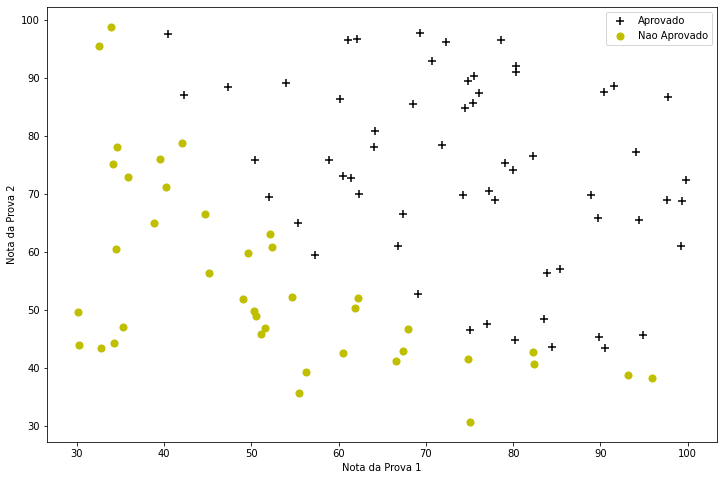

In [138]:
X = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:,2])

pos = X[y == 1]
neg = X[y == 0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(pos[:, :-1], pos[:, -1:], s=50, c='k', marker='+', label='Aprovado')
ax.scatter(neg[:, :-1], neg[:, -1:], s=50, c='y', marker='o', label='Nao Aprovado')
ax.legend()
ax.set_xlabel('Nota da Prova 1')
ax.set_ylabel('Nota da Prova 2')
plt.show()

## Função sigmoide

In [139]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

sigmoid(0)

0.5

## Função de custo e gradiente

In [162]:
def compute_cost(theta, X, y):
    m = len(y)
    grad0 = -y * np.log(sigmoid(X @ theta))
    grad1 = (1 - y) * np.log(1 - sigmoid(X @ theta))
    return np.sum(grad0 - grad1) / m

m, n = X.shape
X_norm = np.append(np.ones((m,1)),X,axis=1)
y_norm = y.reshape(m, 1)
theta = np.array([0., 0., 0.], ndmin=2)
compute_cost(theta.T, X_norm, y_norm)

0.6931471805599453

## Aprendizado dos parâmetros

In [154]:
import scipy.optimize as opt

def gradient(theta, X, y):
    m = len(y)
    return (X.T @ (sigmoide(X @ theta) - y)) / m 

result = opt.fmin_tnc(func=compute_cost, x0=theta, fprime=gradient, args=(X_norm, y_norm.flatten()))
print(result)
custo_reglog(result[0], X_norm, y_norm)

(array([-25.16131863,   0.20623159,   0.20147149]), 36, 0)


0.2034977015894746

## Avaliação do modelo

In [155]:
def predizer(theta, X):
    probabilidade = sigmoide(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probabilidade]

def acuracia(X, y, result):
    theta_min = np.matrix(result[0])
    predicoes = predizer(theta_min, X)
    corretas = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predicoes, y)]  
    return (sum(map(int, corretas)) % len(corretas))

acuracia(X_norm, y_norm, result)

89